In [61]:
%load_ext autoreload
%autoreload 2

In [68]:
import numpy as np
import pandas as pd
import missingno as ms
from src.loan_pred.visualization.visualize import Plots
import seaborn as sns
import matplotlib.pyplot as plt
from src.loan_pred.preprocessing.preprocess import convert_dtype

## Explorations datasets

### I- Data: traindemographics dataset

In [69]:
train_dg = pd.read_csv("../data/raw_data/train/traindemographics.csv")
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [70]:
train_dg.shape

(4346, 9)

## Missing values

In [71]:
# Purcentage of data that is missing
train_dg.isnull().sum()/train_dg.shape[0] * 100

customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
bank_branch_clients           98.826507
employment_status_clients     14.910262
level_of_education_clients    86.493327
dtype: float64

We notice that the column bank_branch_clients and level_of_education_clients and mainly missing more than 85%. We will remove those two columns. We will impute the missing values of the column employment_status_clients

In [72]:
train_dg.drop(["bank_branch_clients", "level_of_education_clients"], axis=1, inplace=True)

<AxesSubplot:>

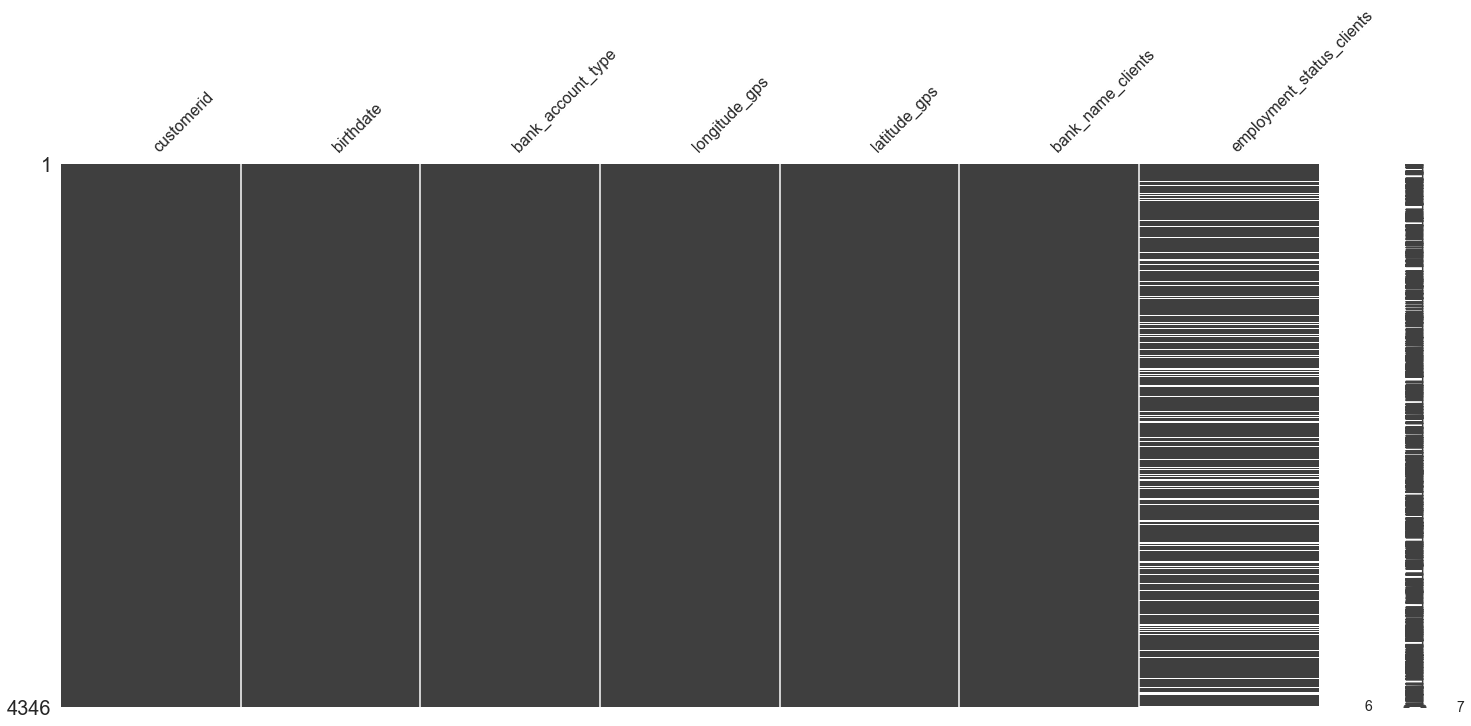

In [73]:
ms.matrix(train_dg)

In [74]:
train_dg.employment_status_clients.unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

Verdict:
- Créer une nouvelle colonne qui mentionne 1 si la valeur de employment_status_clients est manquante sinon 0
- Imputer les valeur manquantes de employment_status_clients par le mode de la colonne en question (première phase). sinon une imputation intelligente

## Duplicate and low variation data

In [75]:
train_dg.shape

(4346, 7)

In [76]:
train_dg.drop_duplicates().reset_index(drop=True, inplace=True)

In [77]:
train_dg.shape

(4346, 7)

we actually had 12 duplicates rows.
Let's check the variation of the columns (categorical columns)

In [78]:
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent


In [79]:
types = {
    "customerid": "category",
    "birthdate": "datetime",
    "bank_account_type": "category",
    "bank_name_clients": "category",
    "employment_status_clients": "category",
    "longitude_gps": "float",
    "latitude_gps": "float"
}
train_dg = convert_dtype(data=train_dg, columns_type=types)

In [80]:
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Permanent
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Permanent


In [81]:
# Let's create a missingvalue column: 1 for missing and 0 for not missing
train_dg["is_missing_emp_status_clients"] = train_dg["employment_status_clients"].isnull()
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,is_missing_emp_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,True
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent,False
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,True
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Permanent,False
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Permanent,False


In [82]:
employment_status_client_mode =  train_dg.employment_status_clients.mode()[0]
print(employment_status_client_mode)
train_dg.fillna({"employment_status_clients": employment_status_client_mode}, inplace=True)
train_dg.reset_index(drop=True, inplace=True)
train_dg.head()

Permanent


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,is_missing_emp_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Permanent,True
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent,False
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Permanent,True
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Permanent,False
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Permanent,False


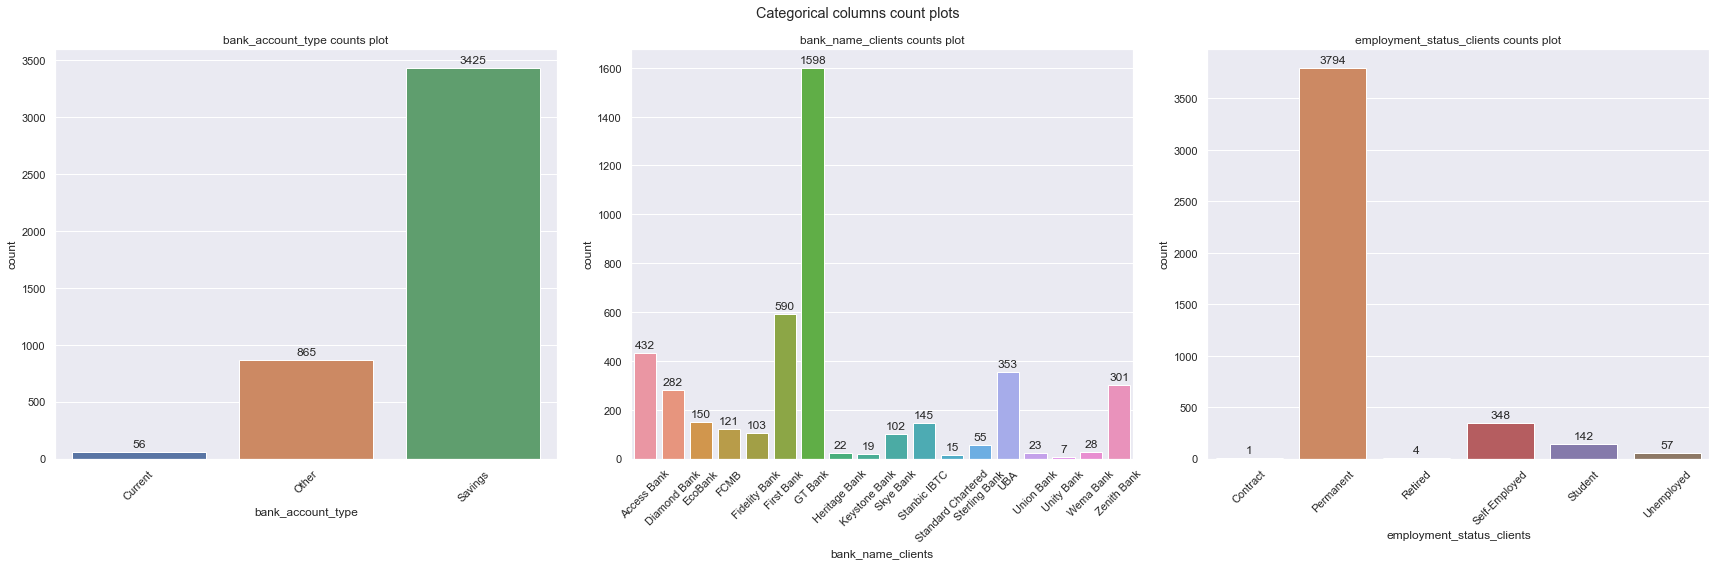

In [67]:
plots = Plots(data=train_dg, cat_cols=["bank_account_type", "bank_name_clients", "employment_status_clients"])
plots.plot_all_cats(nrows=1, ncols=3, figsize=(24,8))

* bank_account_type: As we can see, the category savings is very rare, and we have the majority which is current, as reasonnable way to handle that, we will combine savings and other type of account together, thus we will end up with 2 categoriea in that column
* bank_name_clients: We will reduce the category using the categorical embedding methods and define the proper number of category

Let's analyse the continous value

In [85]:
from pathlib import Path
path = Path("../data/preprocessed/train/train_dg.csv")
path.parent.mkdir(parents=True, exist_ok=True)
train_dg.to_csv(path, index=False)